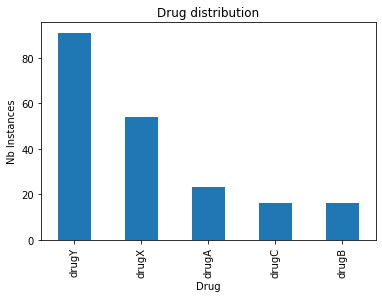

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
performanceFile = open('drugs-performance.txt', "a")


def printPerformance(actual, predicted, classifier):
    confusionMatrix = metrics.confusion_matrix(actual,predicted,labels=['drugA','drugB','drugC','drugX','drugY'])
    accuracy = metrics.accuracy_score(actual,predicted)
    macroF1 = metrics.f1_score(actual,predicted,labels=['drugA','drugB','drugC','drugX','drugY'],average="macro")
    weightedF1 = metrics.f1_score(actual,predicted,labels=['drugA','drugB','drugC','drugX','drugY'],average="weighted")
    TP = np.diagonal(confusionMatrix)
    FP = np.sum(confusionMatrix,axis=0) - TP
    FN = np.sum(confusionMatrix,axis=1) - TP

    TN = []
    for i in range(5):
        temp = np.delete(confusionMatrix,i,0)
        temp = np.delete(temp,i,1)
        TN.append(sum(sum(temp)))

    precision = np.round_(TP/(TP+FP),2)
    recall =  np.round_(TP/(TP+FN))
    F1 = np.round_(2 * (precision * recall) / (precision + recall),2)

    performanceFile.writelines([
        '----------------------------------------------\n',
        classifier + '\n',
        '----------------------------------------------\n',
        'ConfusionMatrix:\n\n',
        str(confusionMatrix) + '\n\n',
        'DrugA => Precision=' + str(precision[0]) + ', Recall=' + str(recall[0]) + ', F1=' + str(F1[0]),
        '\nDrugB => Precision=' + str(precision[1]) + ', Recall=' + str(recall[1]) + ', F1=' + str(F1[1]),
        '\nDrugC => Precision=' + str(precision[2]) + ', Recall=' + str(recall[2]) + ', F1=' + str(F1[2]),
        '\nDrugX => Precision=' + str(precision[3]) + ', Recall=' + str(recall[3]) + ', F1=' + str(F1[3]),
        '\nDrugY => Precision=' + str(precision[4]) + ', Recall=' + str(recall[4]) + ', F1=' + str(F1[4]) + '\n\n',
        'Accuracy=' + str(accuracy) + '\n',
        'Macro-average F1=' + str(round(macroF1,2)) + '\n',
        'Weighted-average F1=' + str(round(weightedF1,2)),
        '\n'
        ])

# Retrieving data and creating distribution figure
df = pd.read_csv('./drug200.csv')
axes = df.Drug.value_counts().plot(kind='bar', title='Drug distribution')
axes.set_xlabel("Drug")
axes.set_ylabel("Nb Instances")
plt.savefig('drug-distribution.pdf')

# Converting to numerical
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.BP = le.fit_transform(df.BP)
df.Cholesterol = le.fit_transform(df.Cholesterol)
y = df.pop('Drug')

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df, y)

# Gaussian Naive Bayes run
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predicted = gnb.predict(X_test)
printPerformance(y_test, y_predicted, 'a) Gaussian Naive Bayes')

# Base Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predicted = dt.predict(X_test)
printPerformance(y_test, y_predicted, 'b) Base Decision Tree')

performanceFile.close()